In [1]:
# Importing required libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading and Understanding the Dataset

In [2]:
# Importing the required dataset

bike_sharing = pd.read_csv("day.csv")
bike_sharing.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [3]:
# Displaying the shape of the dataset
bike_sharing.shape

(730, 16)

In [4]:
# Information about the columns present in the dataset
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Description of the numerical columns present in the dataset
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Inferences from the information about the dataset:
1. Columns for season, year, month, holiday, weekday, workingday, weathersit are categorical, but they are expressed as numbers. So we can convert them to categorical variables first, so that dummy variables creations will be easily done on those columns.
2. There are some columns like date, which doesn't have correct data type. We have to convert those into required format.

### Data Preparation and Exploratory Data Analysis

In [6]:
bike_sharing.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [7]:
# Converting the dteday from object to datetime.
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
# Conversion of numeric season column into categorical season column
bike_sharing.season = bike_sharing[['season']].apply(lambda x: x.map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}))

In [9]:
# Conversion of numeric year column into categorical year column
bike_sharing.yr = bike_sharing[['yr']].apply(lambda x: x.map({
    0: '2018',
    1: '2019'
}))

In [10]:
# Conversion of numeric month column into categorical month column
bike_sharing.mnth = bike_sharing[['mnth']].apply(lambda x: x.map({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}))

In [11]:
# Conversion of numeric weekday column into categorical weekday column
bike_sharing.weekday = bike_sharing[['weekday']].apply(lambda x: x.map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}))

In [12]:
# Conversion of numeric weathersit column into categorical weathersit column
bike_sharing.weathersit = bike_sharing[['weathersit']].apply(lambda x: x.map({
    1: 'Clear',
    2: 'Mist and Cloudy',
    3: 'Light Snow',
    4: 'Heavy Rain'
}))

In [13]:
# Conversion of numeric holiday and working day columns into categorical columns
# We can ignore this step,also to get the dummy variables directly using get_dummies or any other library, it will be a quite easier task.
bike_sharing.holiday = bike_sharing[['holiday']].apply(lambda x: x.map({
    0: 'No',
    1: 'Yes'
}))

bike_sharing.workingday = bike_sharing[['workingday']].apply(lambda x: x.map({
    0: 'No',
    1: 'Yes'
}))

In [14]:
# Dropping the instant column as it is used for just indexing purpose and might not be required to achieve the business goal.
bike_sharing.drop(['instant'],inplace=True,axis=1)

In [15]:
# Displaying the data
bike_sharing.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,2018,Jan,No,Monday,Yes,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,Spring,2018,Jan,No,Tuesday,Yes,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,Spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,Spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,Spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2018-06-01,Spring,2018,Jan,No,Saturday,No,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2018-07-01,Spring,2018,Jan,No,Sunday,No,Mist and Cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2018-08-01,Spring,2018,Jan,No,Monday,Yes,Mist and Cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2018-09-01,Spring,2018,Jan,No,Tuesday,Yes,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2018-10-01,Spring,2018,Jan,No,Wednesday,Yes,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [16]:
# Displaying the columns' information
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 85.7+ 

In [17]:
# Splitting the cateogrical and numeric columns into separate lists for further analysis
categorical_bike_sharing = ['season', 'yr', 'mnth' , 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_bike_sharing = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

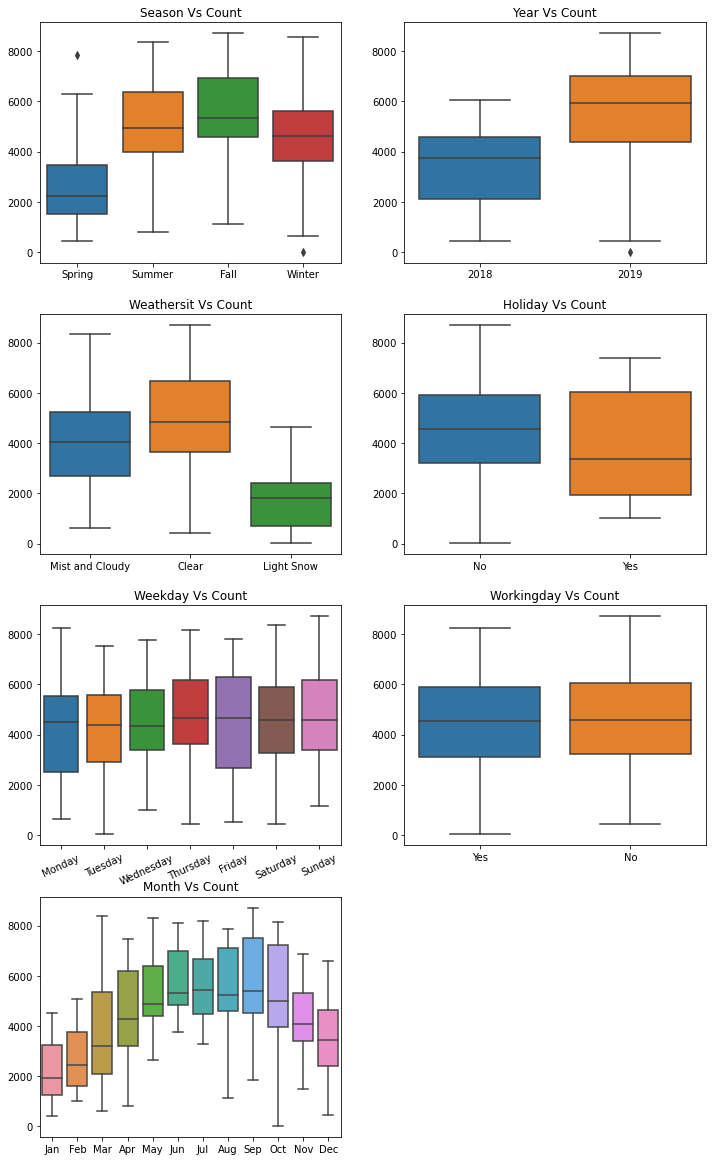

In [18]:
# Analysing the categorical columns w.r.t cnt using boxplots
plt.figure(figsize=(10,16))

plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt',data=bike_sharing)
plt.xlabel('')
plt.ylabel('')
plt.title('Season Vs Count')

plt.subplot(4,2,2)
sns.boxplot(x='yr',y='cnt',data=bike_sharing)
plt.xlabel('')
plt.ylabel('')
plt.title('Year Vs Count')

plt.subplot(4,2,3)
sns.boxplot(x='weathersit',y='cnt',data=bike_sharing)
plt.xlabel('')
plt.ylabel('')
plt.title('Weathersit Vs Count')

plt.subplot(4,2,4)
sns.boxplot(x='holiday',y='cnt',data=bike_sharing)
plt.xlabel('')
plt.ylabel('')
plt.title('Holiday Vs Count')

plt.subplot(4,2,5)
sns.boxplot(x='weekday',y='cnt',data=bike_sharing)
plt.xlabel('')
plt.ylabel('')
plt.title('Weekday Vs Count')
plt.xticks(rotation=25)

plt.subplot(4,2,6)
sns.boxplot(x='workingday',y='cnt',data=bike_sharing)
plt.xlabel('')
plt.ylabel('')
plt.title('Workingday Vs Count')

plt.tight_layout(w_pad=3)

plt.subplot(4,2,7)
sns.boxplot(x='mnth',y='cnt',data=bike_sharing)
plt.xlabel('')
plt.ylabel('')
plt.title('Month Vs Count')

plt.show()

### Inferences from the above boxplots:
- Spring season have very less average counts of bike sharing amongst all other seasons.
- The overall bike sharing in 2019 is higher compared to 2018.
- When there is light snow, the bike sharing count is dropped with respect to other weather conditions.
- The distribution of bike sharing is somewhat similar in both the cases whether there is holiday or not, but median is somewhat higher when there is no holiday, meaning the average bike sharing is higher when there is not a holiday.
- The distribution for count of rental bikes is similar almost for every day in the week. The same is the case for workingday column, the distribution is similar.
- In the months from April to Nov, the bike rental counts is higher compared to other months.

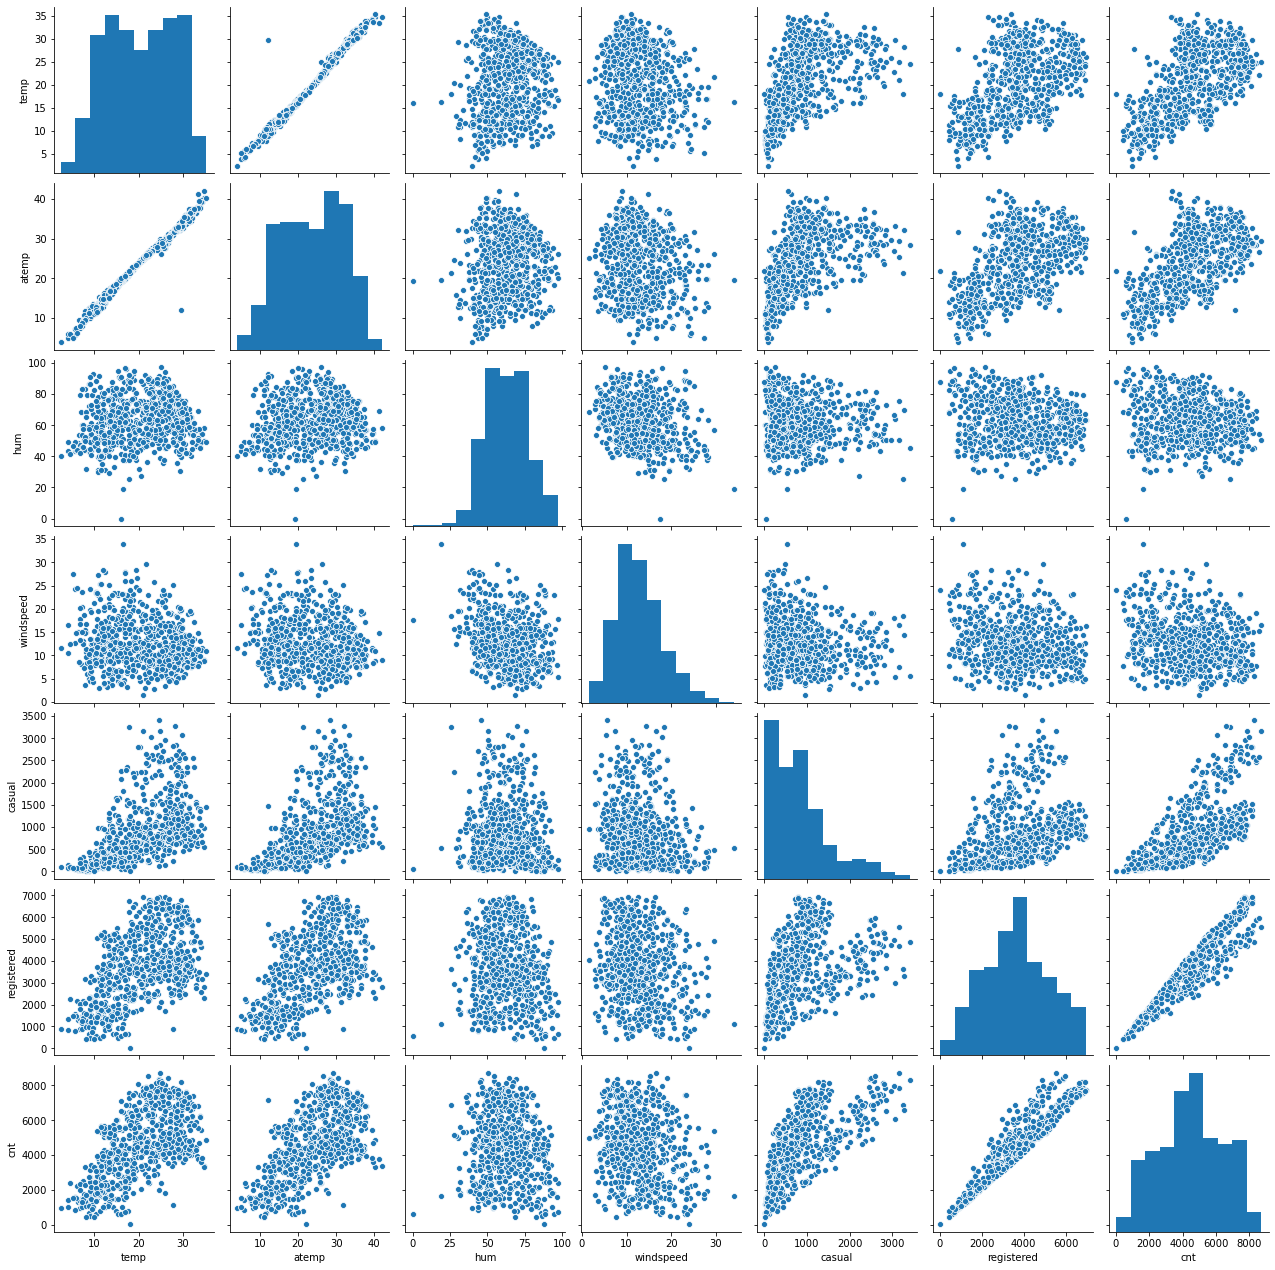

In [19]:
# Analysing the numeric columns using pairplot for interdependency
sns.pairplot(bike_sharing[numerical_bike_sharing])
plt.show()

### Inferences from the above pairplot:
- With reference to the count (cnt) column, the distribution of all other columns except registered (casual also) is evenly distributed and we can say that there is no direct relation observed between those.
- For registered column, we can see highly positive linear relation. We have to think about this column in future (with casual also, but it is less linearly related compared to registered).
- Also, there is a similar highly positive linear relationship between temp and atemp columns, we can think to drop any one of the columns in future.

In [20]:
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,2018,Jan,No,Monday,Yes,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,Spring,2018,Jan,No,Tuesday,Yes,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,Spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,Spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,Spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Creating Dummy Variables

In [21]:
dummies_catogerical = pd.get_dummies(bike_sharing[categorical_bike_sharing], drop_first=True)
updated_bike_sharing = pd.concat([bike_sharing, dummies_catogerical], axis = 1)

In [22]:
updated_bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist and Cloudy
0,2018-01-01,Spring,2018,Jan,No,Monday,Yes,Mist and Cloudy,14.110847,18.18125,...,0,1,0,0,0,0,0,1,0,1
1,2018-02-01,Spring,2018,Jan,No,Tuesday,Yes,Mist and Cloudy,14.902598,17.68695,...,0,0,0,0,0,1,0,1,0,1
2,2018-03-01,Spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,...,0,0,0,0,0,0,1,1,0,0
3,2018-04-01,Spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,...,0,0,0,0,1,0,0,1,0,0
4,2018-05-01,Spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# Dropping the previous categorical columns as we have created dummy variables for it.
final_bike_sharing = updated_bike_sharing.drop(categorical_bike_sharing,axis=1)

# Dropping the dteday column as it no longer required for the analysis.
final_bike_sharing.drop(['dteday'],axis=1,inplace=True)

final_bike_sharing.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist and Cloudy
0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
final_bike_sharing.shape

(730, 32)

In [25]:
# Getting the information about the columns
final_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temp                        730 non-null    float64
 1   atemp                       730 non-null    float64
 2   hum                         730 non-null    float64
 3   windspeed                   730 non-null    float64
 4   casual                      730 non-null    int64  
 5   registered                  730 non-null    int64  
 6   cnt                         730 non-null    int64  
 7   season_Spring               730 non-null    uint8  
 8   season_Summer               730 non-null    uint8  
 9   season_Winter               730 non-null    uint8  
 10  yr_2019                     730 non-null    uint8  
 11  mnth_Aug                    730 non-null    uint8  
 12  mnth_Dec                    730 non-null    uint8  
 13  mnth_Feb                    730 non

### Splitting the data into training and test data sets

In [26]:
train_bike_sharing, test_bike_sharing = train_test_split(final_bike_sharing, train_size = 0.7, random_state=100)

### Rescaling the Features
- We are going to use scaling, as scaling doesn't impact model results, and it will be helpful to analyze the coefficients easily.
- We will use MinMaxScaling, as it scales the values between 0 to 1, so we can analyze the effect of each predictor in more detail using beta values (Those will be non-comparable when not scaled as they can take any values based on the units).  

In [27]:
train_bike_sharing.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist and Cloudy
576,29.246653,33.1448,70.4167,11.083475,968,6248,7216,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,16.980847,20.6746,62.1250,10.792293,956,3110,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,10.489153,11.5850,48.3333,23.500518,364,1432,1796,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,15.443347,18.8752,48.9583,8.708325,1120,3100,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,13.803347,16.0977,72.9583,14.707907,177,1506,1683,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
scaler = MinMaxScaler()

In [29]:
for_scaling = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
train_bike_sharing[for_scaling] = scaler.fit_transform(train_bike_sharing[for_scaling])
train_bike_sharing.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist and Cloudy
576,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [30]:
# Simultaneously scaling the test data set. This can be done later also, but as we are transforming the dataset, it will be no harm to the test data set at any stage.
test_bike_sharing[for_scaling] = scaler.transform(test_bike_sharing[for_scaling])
test_bike_sharing.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist and Cloudy
184,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,0,0,0,...,1,0,0,0,0,0,1,0,0,1
535,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,0,1,0,...,0,0,0,0,1,0,0,1,0,0
299,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,0,0,1,...,0,0,1,0,0,0,0,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,0,1,0,...,0,0,1,0,0,0,0,0,0,0


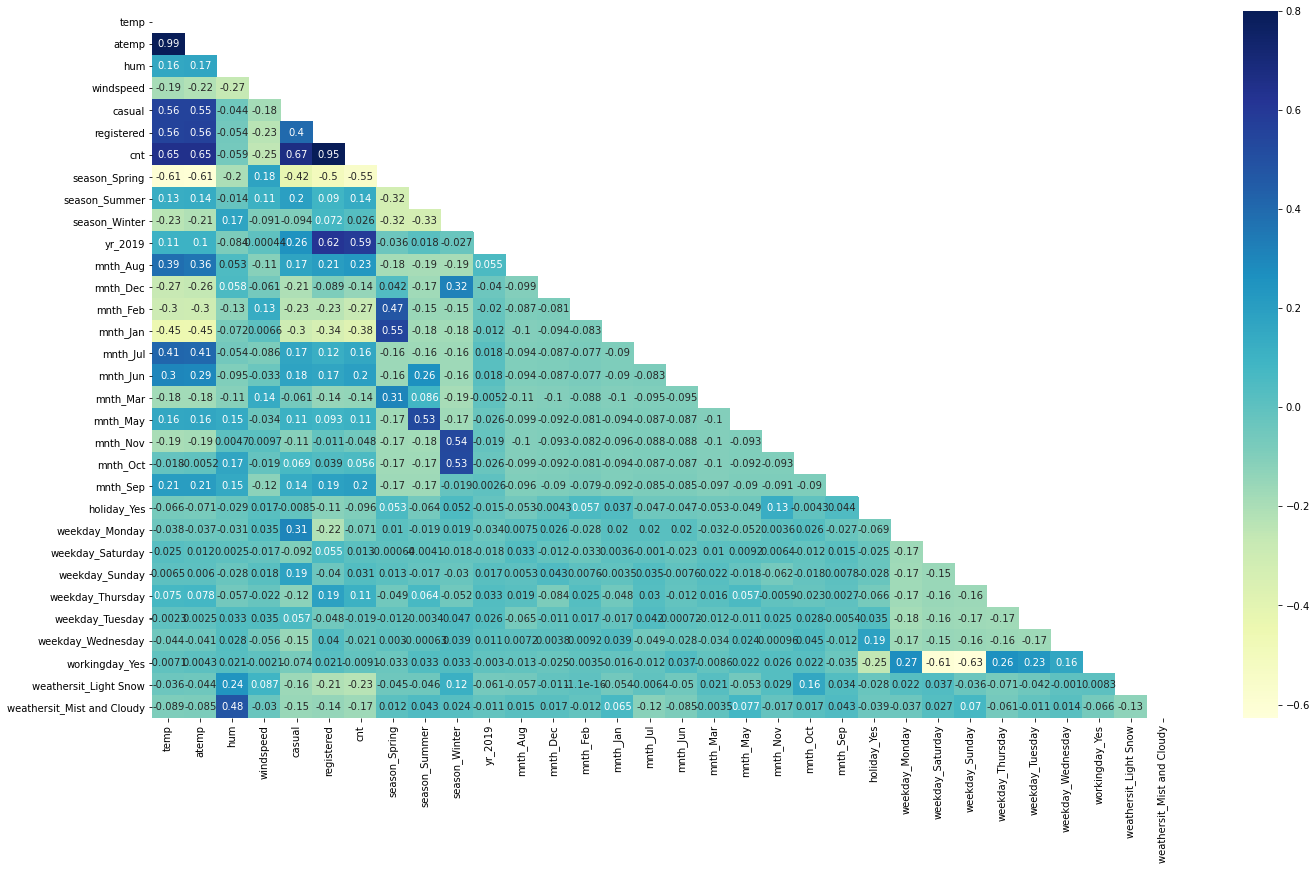

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (23, 13))
mask = np.triu(np.ones_like(train_bike_sharing.corr()))
sns.heatmap(train_bike_sharing.corr(), mask=mask, cmap='YlGnBu', vmax=0.8, annot=True)
plt.show()

#### Inferences from the above heatmap:
- We can see there is highly positive correlation between temp and atemp variables. So we might face multicollinearity problem due to presence of both the variables in the model.
- Similar relation which is highly positive is observed between cnt and registered. Logically, cnt is the summation of registered and casual, so we might need to think between those variables once we start building the model.
- There is highly negative correlation between weekday_Saturday, weekday_Sunday and working_day. As logically, both means the exactly same, we can think to consider only working day or only weekday in the model or else avoid using both the variables simultaneously to avoid multicollinearity problem.

In [32]:
# We can see there is very high correlation between cnt and registered, logically cnt is the sum of registered users and casual users.
# We might not need those as ultimately we are running our analysis for cnt and it's value is exactly the summation of those two.
# To achieve the business goal, dropping those two might not cause harm, as we will be predicting the count value.
# Dropping registered and casual columns as per logical understanding.

train_bike_sharing.drop(['registered','casual'],axis=1,inplace=True)

In [33]:
# Also there is a very high positive correlation between atemp and temp,
# So we can drop the column before building the model also, as we are already convinced with the positive relation between those.

train_bike_sharing.drop(['atemp'],axis=1,inplace=True)

In [34]:
# We have both flags for holiday and working day.
# As a holiday generally cannot be a working day, so might need to drop the holiday column flag by logical understanding.

train_bike_sharing.drop(['holiday_Yes'],axis=1,inplace=True)

### Model Building

#### Dividing X and y sets for model building

In [35]:
# Dividing the training data into X and y for model building
y_train_bike_sharing = train_bike_sharing.pop('cnt')
X_train_bike_sharing = train_bike_sharing

In [36]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_bike_sharing, y_train_bike_sharing)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train_bike_sharing, y_train_bike_sharing)

In [37]:
# Displaying the information with their rank of support for the model
list(zip(X_train_bike_sharing.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 5),
 ('weekday_Wednesday', False, 9),
 ('workingday_Yes', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist and Cloudy', True, 1)]

In [38]:
# Extracting the required columns for model building
col_to_consider = list(X_train_bike_sharing.columns[rfe.support_])

In [39]:
# Using statsmodels to build the model and view the required summary
lm = sm.OLS(y_train_bike_sharing,sm.add_constant(X_train_bike_sharing[col_to_consider])).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.8
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.74e-187
Time:                        22:44:33   Log-Likelihood:                 511.01
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     494   BIC:                            -922.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2016      0.045      4.485      0.000       0.113       0.290
temp                           0.5124      0.035     14.661      0.000       0.444       0.581
hum                           -0.1606      0.038     -4.231      0.000      -0.235      -0.086
windspeed                     -0.1884      0.026     -7.273      0.000      -0.239      -0.137
season_Spring                 -0.0513      0.021     -2.438      0.015      -0.093      -0.010
season_Summer                  0.0513      0.015      3.398      0.001       0.022       0.081
season_Winter                  0.0912      0.018      5.194      0.000       0.057       0.126
yr_2019                        0.2309      0.008     28.365      0.000       0.215       0.247
mnth_Jan                      -0.0332      0.018     -1.880      0.061      -0.068       0.002
mnth_Jul                      -0.0558      0.018     -3.043      0.002      -0.092      -0.020
mnth_Sep                       0.0822      0.017      4.908      0.000       0.049       0.115
weekday_Saturday               0.0986      0.030      3.330      0.001       0.040       0.157
weekday_Sunday                 0.1050      0.030      3.557      0.000       0.047       0.163
workingday_Yes                 0.0852      0.028      3.061      0.002       0.030       0.140
weathersit_Light Snow         -0.2397      0.026     -9.067      0.000      -0.292      -0.188
weathersit_Mist and Cloudy    -0.0544      0.011     -5.152      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       68.683   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.430
Skew:                          -0.734   Prob(JB):                     2.16e-33
Kurtosis:                       5.219   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inferences:
- The R-Squared and Adjusted R-Squared, F-statistics and Prob(F) is also considerably good.
-  But looking at the p values of each column, we might need to reconsider the model as there are some columns with p value greater than 0.05 (Insignificant).
- We will now analyze the model further using VIFs also and analyzing results after dropping some columns at every step.

#### Calculating VIFs of the above columns.

In [40]:
# Calculate the VIFs for the new model
def cal_vif(col_to_consider):
    vif = pd.DataFrame()
    X = X_train_bike_sharing[col_to_consider]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [41]:
cal_vif(col_to_consider)

,Features,VIF
1,hum,32.97
12,workingday_Yes,21.16
0,temp,20.31
3,season_Spring,5.10
2,windspeed,4.99
11,weekday_Sunday,4.81
10,weekday_Saturday,4.64
5,season_Winter,3.84
4,season_Summer,3.07
14,weathersit_Mist and Cloudy,2.33


- We can see there is very high VIF value for `hum`, we should consider the model after dropping the hum column.

In [42]:
# Dropping the atemp from the model and rebuilding it.
col_to_consider.remove('hum')

In [43]:
lm = sm.OLS(y_train_bike_sharing,sm.add_constant(X_train_bike_sharing[col_to_consider])).fit()
print(lm.summary())
print("\n\nVIFs of columns: ")
print(cal_vif(col_to_consider))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.0
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          7.95e-185
Time:                        22:45:07   Log-Likelihood:                 501.94
No. Observations:                 510   AIC:                            -973.9
Df Residuals:                     495   BIC:                            -910.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- We can see there are some satisfactory p values, but there are some predictors with very high VIF values, so might need to drop those.
-  For workingday flag, there is very high value, so we can build the model in two ways here.
    - By considering only the workingday_Yes flag and removing the weekday_Sunday and weekday_Saturday flag.
    - By removing only workingday_Yes flag and keeping both weekday_Sunday and weekday_Saturday flag.
        - The reason behind this is, we have already observed a high correlation between workingday_Yes and weekday_Sunday, weekday_Saturday flags/predictors.

In [44]:
# Dropping the workingday_Yes flag from the columns to consider list.
col_to_consider.remove('workingday_Yes')

In [45]:
lm = sm.OLS(y_train_bike_sharing,sm.add_constant(X_train_bike_sharing[col_to_consider])).fit()
print(lm.summary())
print("\n\nVIFs of columns: ")
print(cal_vif(col_to_consider))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          5.96e-184
Time:                        22:45:21   Log-Likelihood:                 497.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     496   BIC:                            -906.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [46]:
# The p-value for weekday_Saturday is suddenly affected it became very insignificant
# So, let's analyze the model dropping that too.
col_to_consider.remove('weekday_Saturday')

In [47]:
lm = sm.OLS(y_train_bike_sharing,sm.add_constant(X_train_bike_sharing[col_to_consider])).fit()
print(lm.summary())
print("\n\nVIFs of columns: ")
print(cal_vif(col_to_consider))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.2
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.27e-184
Time:                        22:45:34   Log-Likelihood:                 495.93
No. Observations:                 510   AIC:                            -965.9
Df Residuals:                     497   BIC:                            -910.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [48]:
# Ahh, the same case happened with weekday_Sunday
# Let's consider the model dropping that column too
col_to_consider.remove('weekday_Sunday')

In [49]:
lm = sm.OLS(y_train_bike_sharing,sm.add_constant(X_train_bike_sharing[col_to_consider])).fit()
print(lm.summary())
print("\n\nVIFs of columns: ")
print(cal_vif(col_to_consider))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.6
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          4.79e-185
Time:                        22:45:55   Log-Likelihood:                 494.12
No. Observations:                 510   AIC:                            -964.2
Df Residuals:                     498   BIC:                            -913.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- Our previous consideration for the model using one of the variables from workingday_Yes or weekday_Saturday, weekday_Sunday was wrong, as even after considering either the way, we ought to drop those three models.

- We have got all the values as satisfactorily significant, using this model.
- However, we can observe the VIF value of temp is slightly greater than 5, so might also need to consider a model after dropping the temp and further predictors from the analysis if any and compare the r2_score with the previous model
- Also, we can see mnth_Jan is slightly insignificant with p value as 0.031, so we can also build another model dropping this predictor and subsequents and compare the r2_score with this model.
- Hence, this way, we can decide the predictive value of the models comparing the r2_score.

#### Model 1: Analysis of the r-squared and p values

In [50]:
first_model_cols = col_to_consider[:]
model1 = sm.OLS(y_train_bike_sharing,sm.add_constant(X_train_bike_sharing[first_model_cols])).fit()
print(model1.summary())
print("\n\nVIFs of columns: ")
print(cal_vif(first_model_cols))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.6
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          4.79e-185
Time:                        22:46:09   Log-Likelihood:                 494.12
No. Observations:                 510   AIC:                            -964.2
Df Residuals:                     498   BIC:                            -913.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Calculating the r2_score and mean_squared_error for Model 1

In [52]:
# Dividing the training data into X and y for model building
y_test_bike_sharing = test_bike_sharing.pop('cnt')
X_test_bike_sharing = test_bike_sharing

In [53]:
# Making predictions using the model 1
X = X_test_bike_sharing[first_model_cols]
predicted_count = model1.predict(sm.add_constant(X))

# Calculating the mean squared error and r-squared values
pred_mse = mean_squared_error(y_test_bike_sharing, predicted_count)
pred_r_squared = r2_score(y_test_bike_sharing, predicted_count)
pred_adj_r_squared = (1 - (1-pred_r_squared)*(len(predicted_count)-1)/(len(predicted_count)-X.shape[1]-1))
data = {'Train_Data':
        {'R-squared' : model1.rsquared,
         'Adjusted R-squared' : model1.rsquared_adj},
        'Test_Data':
        {'R-squared' : pred_r_squared,
         'Adjusted R-squared' : pred_adj_r_squared}}
model1_results = pd.DataFrame(data)
print("Mean Squared Error for Model 1: ",pred_mse)
print("\n",model1_results)

Mean Squared Error for Model 1:  0.009516191555932625

                     Train_Data  Test_Data
R-squared             0.832233   0.800976
Adjusted R-squared    0.828527   0.790451


#### Building Model 2:
- Dropping the temp and subsequent columns and then calculate the MSE and R2 values for comparison with first model.

In [54]:
# The VIF value of temp is slightly greater than 5, there are some predictors variables from season and month are present which might be causing the correlation between those.
# Let's see the effect after dropping the temp variable.
second_model_cols = col_to_consider[:]
second_model_cols.remove('temp')

In [57]:
model2 = sm.OLS(y_train_bike_sharing,sm.add_constant(X_train_bike_sharing[second_model_cols])).fit()
print(model2.summary())
print("\n\nVIFs of columns: ")
print(cal_vif(second_model_cols))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     185.7
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          3.37e-153
Time:                        22:48:23   Log-Likelihood:                 413.31
No. Observations:                 510   AIC:                            -806.6
Df Residuals:                     500   BIC:                            -764.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
# The VIF values are satisfactory but suddenly the mnth_Jul became insignificant.
# Dropping the mnth_Jul and rebuilding the model.

second_model_cols.remove('mnth_Jul')

In [58]:
model2 = sm.OLS(y_train_bike_sharing,sm.add_constant(X_train_bike_sharing[second_model_cols])).fit()
print(model2.summary())
print("\n\nVIFs of columns: ")
print(cal_vif(second_model_cols))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     185.7
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          3.37e-153
Time:                        22:48:29   Log-Likelihood:                 413.31
No. Observations:                 510   AIC:                            -806.6
Df Residuals:                     500   BIC:                            -764.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- All the values are significant, and the VIF values are also satisfactory.
- So, we will calculate the r2 and MSE values for this model

In [59]:
# Making predictions using the model 2
X = X_test_bike_sharing[second_model_cols]
predicted_count = model2.predict(sm.add_constant(X))

# Calculating the mean squared error and r-squared values
pred_mse = mean_squared_error(y_test_bike_sharing, predicted_count)
pred_r_squared = r2_score(y_test_bike_sharing, predicted_count)
pred_adj_r_squared = (1 - (1-pred_r_squared)*(len(predicted_count)-1)/(len(predicted_count)-X.shape[1]-1))
data = {'Train_Data':
        {'R-squared' : model2.rsquared,
         'Adjusted R-squared' : model2.rsquared_adj},
        'Test_Data':
        {'R-squared' : pred_r_squared,
         'Adjusted R-squared' : pred_adj_r_squared}}
model2_results = pd.DataFrame(data)
print("Mean Squared Error for Model 2: ",pred_mse)
print("\n",model2_results)

Mean Squared Error for Model 2:  0.012713422017268019

                     Train_Data  Test_Data
R-squared             0.769680   0.734108
Adjusted R-squared    0.765534   0.722713


- The MSE value is increased as compared to first model
- The r-squared value is decreased compared to the first model.
- So we can say that, the temp variable is required and will help in making the better predictions. Model1 is better than Model2.

#### Building Model 3:
- In model 1, we have seen that the value for mnth_Jan was slightly insignificant (Not heavily)
- So, we can consider another model dropping the mnth_Jan from the predictions and then compare the MSE and R2 value with the first model.

In [60]:
third_model_cols = col_to_consider[:]
third_model_cols.remove('mnth_Jan')

In [61]:
model3 = sm.OLS(y_train_bike_sharing,sm.add_constant(X_train_bike_sharing[third_model_cols])).fit()
print(model3.summary())
print("\n\nVIFs of columns: ")
print(cal_vif(third_model_cols))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          3.00e-185
Time:                        22:49:54   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [62]:
# Making predictions using the model 3
X = X_test_bike_sharing[third_model_cols]
predicted_count = model3.predict(sm.add_constant(X))

# Calculating the mean squared error and r-squared values
pred_mse = mean_squared_error(y_test_bike_sharing, predicted_count)
pred_r_squared = r2_score(y_test_bike_sharing, predicted_count)
pred_adj_r_squared = (1 - (1-pred_r_squared)*(len(predicted_count)-1)/(len(predicted_count)-X.shape[1]-1))
data = {'Train_Data':
        {'R-squared' : model3.rsquared,
         'Adjusted R-squared' : model3.rsquared_adj},
        'Test_Data':
        {'R-squared' : pred_r_squared,
         'Adjusted R-squared' : pred_adj_r_squared}}
model3_results = pd.DataFrame(data)
print("Mean Squared Error for Model 3: ",pred_mse)
print("\n",model3_results)

Mean Squared Error for Model 3:  0.0093930471481844

                     Train_Data  Test_Data
R-squared             0.830664   0.803551
Adjusted R-squared    0.827271   0.794152


- We can observe an increase in the r-squared-value and slightly decrease in the MSE value.
- We can say that Model 3 is better than the Model 1.
- Hence, we can consider Model 3 for making predictions and Residual Analysis.

In [63]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          3.00e-185
Time:                        22:51:04   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Conclusions:
- Considering the above models for predicting the test data sets,
    - First Model (Model 1):
        - Train Data:
            -  R2: 0.8323
            -  Adj-R2: 0.8285
        - Test Data:
            - R2: `0.8009`
            - Adj-R2: `0.7904`
    - Second Model (Model 2):
        - Train Data:
            -  R2: 0.7696
            -  Adj-R2: 0.7655
        - Test Data:
            - R2: `0.7341`
            - Adj-R2: `0.7272`
    - Third Model (Model 3):
        - Train Data:
            -  R2: 0.8306
            -  Adj-R2: 0.8272
        - Test Data:
            - R2: `0.8035`
            - Adj-R2: `0.7941`
            
- Analyzing the R2 and Adj-R2 values of models for test data sets, we can say that model 3 is performing well for both test and train data sets. So we can consider the `model 3` for further analysis and prediction.
- Although, model 3 is performing better, there is `not a significant difference between the remaining models`, so we can say that we are sure our model will predict better than other models but we are not sure it is the perfect model for dataset.
- So, there is always scope for further analysis even if we already have a better performing model.
- Till then, we can rely on `Model 3` to make the predictions. We can analyze further for residual analysis and also make predictions using the test dataset.

## Residual Analysis of the Train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [65]:
predicted_count_train = model3.predict(sm.add_constant(X_train_bike_sharing[third_model_cols]))

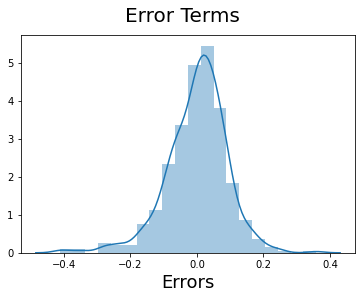

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_bike_sharing - predicted_count_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

#### Inferences from the above Distplot:
- We have plotted the histogram of error terms i.e. difference between the actual and predicted values for the trained data.
- With respect to assumption for linear regression, the error terms should be normally distributed, by observing the above distribution plot, we can say that `the error terms are normally distributed` and the assumption is not violated.

Text(0, 0.5, 'Error Terms')

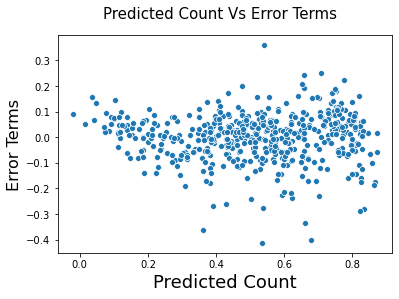

In [68]:
# Let's plot the scatter plot between the residuals and the predicted values.
sns.scatterplot(x=predicted_count_train, y=y_train_bike_sharing-predicted_count_train)
plt.suptitle('Predicted Count Vs Error Terms', fontsize=15) 
plt.xlabel('Predicted Count', fontsize=18)
plt.ylabel('Error Terms', fontsize=16)

#### Inferences from the above scatterplot:
- We don't observe any relationship between the predicted values and error terms.
- So we can say that our model is a very good model as there is no such relation observed between the predicted values and error terms from the scatterplot.

### Analysis of Actual Vs Predicted Value for Test Data

Text(0, 0.5, 'y_pred')

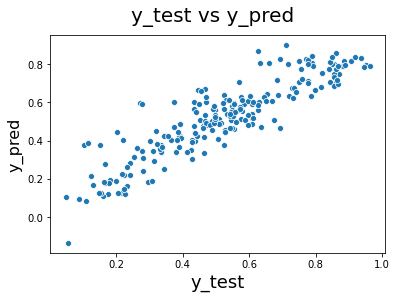

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.scatterplot(y_test_bike_sharing, predicted_count)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

- We can say that there is a good relation between test values and predicted values, as test values doesn't differ from the predicted values quite much. We can fit a perfect line between those, with a positive slope.
- Hence, we can say that the predictions made are significant.- We can say that there is a good relation between test values and predicted values.

Text(0, 0.5, 'Count')

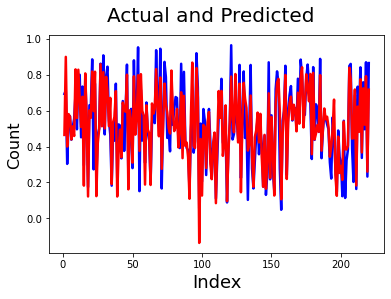

In [70]:
#Actual vs Predicted
c = [i for i in range(1,y_test_bike_sharing.shape[0]+1,1)]
fig = plt.figure()
plt.plot(c,y_test_bike_sharing, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,predicted_count, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Count', fontsize=16)                               # Y-label

#### Inferences from the above scatter plot for the actual vs predicted count on test data for 'cnt' column:
- We have plotted the actual values for cnt column vs the predicted values for cnt column using Model 3.
- Apart from some exceptions, we can observe the exact overlap of predicted values (red) over actual values (blue).
- That means, our model predicted well for the test data.

#### Model Evaluation

In [71]:
# Analysing the summary for the model once again
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          3.00e-185
Time:                        23:01:26   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               


We can see that the equation of our best fitted line is:

$ cnt = 0.1974  \times  temp - 0.1496  \times  windspeed - 0.0696 \times season\_Spring + 0.0469 \times season\_Summer + 0.0792 \times season\_Winter + 0.02339 \times yr\_2019 - 0.0510 \times mnth\_Jul + 0.0734 \times mnth\_Sept - 0.2800 \times weathersit\_Light Snow - 0.0785 \times weathersit\_Mist and Cloudy + 0.1974 $


Overall we have a decent model, but we also acknowledge that we could do better. 

#### Assumptions and Inferences from the model:
- Our model is dependent on many variables combined overall.
- For positive coefficient, the count for bike rental customer is higher, and vice versa.
- We can see cnt is mainly affected by `temp`, as it has the highest positive coefficient. Higher temperature leads to more bike rentals.
- Also, the year 2019 has highest bike rentals overall. If we are going to make predictions for other year apart from 2019, our model can predict those values based on other factors.
- Light Snow, Light Rain, Thunderstorm and Scattered clouds, Light Rain and Scattered clouds weather condition is termed as worst till now, which affects the bike rentals.
- Wind-speed also has some worst effects on the count of bike rentals.
- Thus, the top 5 affecting predictors are temp, year_2019, light snow weather condition, wind speed and winter season. Bike rentals can be higher and lower based on the above 5 predictors.
- There are many other factors which can be considered, and a strategy is made to increase the overall bike rental counts depending upon the above analyzed factors.